In [2]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Get online cryptocurrency proces

In [3]:
end = dt.datetime.now()

start = dt.date( end.year - 5, end.month , end.day )  #trying to get data from 5 years ago

In [5]:
cryptolist = [ 'BTC-USD' , 'ETH-USD']   # pulling data for ethereum and bitcoin against USD

df = reader.get_data_yahoo( cryptolist , start, end )['Adj Close']

In [6]:
df.head()

Symbols,BTC-USD,ETH-USD
Date,,
2016-09-12,609.241028,11.9187
2016-09-13,610.684021,11.9232
2016-09-14,607.155029,11.9370
2016-09-15,606.973022,12.5558
2016-09-16,605.984009,12.6986


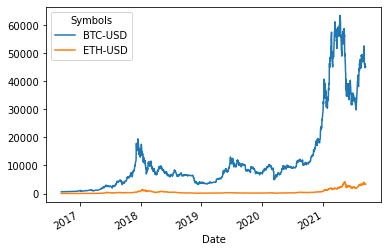

In [8]:
df.plot()
plt.show()

## The prices of bitcoing and ehethereum vary a lot so they are hard to compare

## To compare the cryptocurrencies we would have to work with returns and not absolute prices

In [9]:
daily_returns = df.pct_change().dropna(axis = 0)

In [10]:
daily_returns

Symbols,BTC-USD,ETH-USD
Date,,
2016-09-13,0.002369,0.000378
2016-09-14,-0.005779,0.001157
2016-09-15,-0.000300,0.051839
2016-09-16,-0.001629,0.011373
2016-09-17,0.006419,-0.021057
...,...,...
2021-09-09,-0.032495,-0.062974
2021-09-10,0.007075,0.018301
2021-09-11,0.019066,0.042766


## We are making the returns cummulative to make the cryptocurrencies comparable

In [12]:
daily_cummulative_returns = (daily_returns + 1).cumprod() - 1

In [13]:
daily_cummulative_returns

Symbols,BTC-USD,ETH-USD
Date,,
2016-09-13,0.002369,0.000378
2016-09-14,-0.003424,0.001535
2016-09-15,-0.003723,0.053454
2016-09-16,-0.005346,0.065435
2016-09-17,0.001039,0.043000
...,...,...
2021-09-09,72.671844,268.451014
2021-09-10,73.193061,273.382107
2021-09-11,74.607629,285.116310


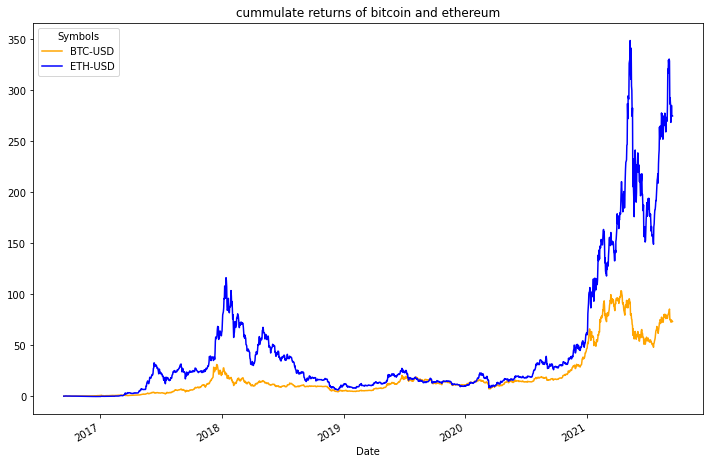

In [15]:
colours = ['orange' , 'b']

daily_cummulative_returns.plot( color = colours , figsize = (12,8))
plt.title ("cummulate returns of bitcoin and ethereum")
plt.show()

## The price charts for the last four years



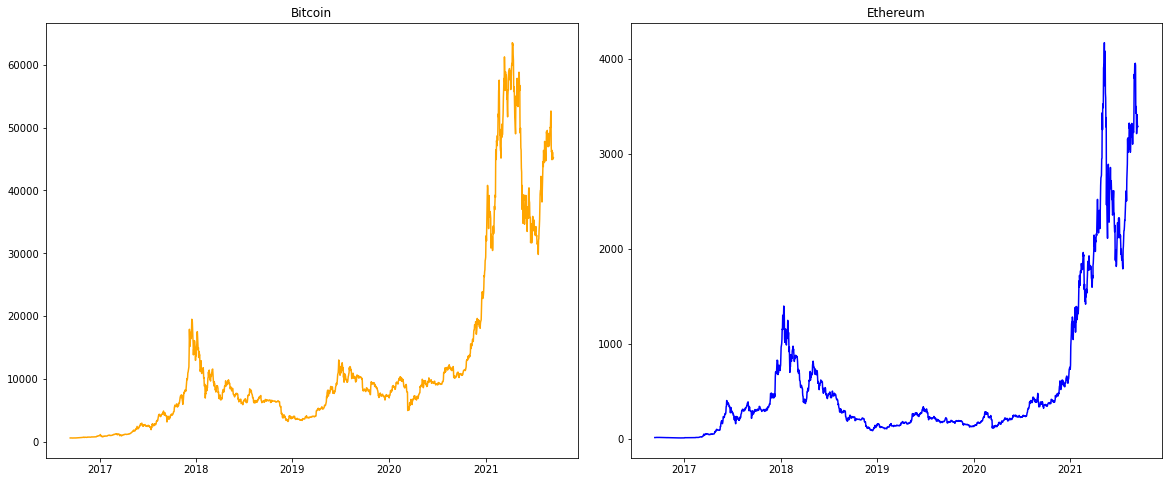

In [26]:
fig, axs = plt.subplots( 1, 2, figsize = (20,8) , gridspec_kw = { 'hspace' : 0.2 , 'wspace' : 0.1 })

axs[0].plot(df['BTC-USD'], c = 'orange')
axs[0].set_title('Bitcoin')

axs[1].plot(df['ETH-USD'] , c = 'blue' ) 
axs[1].set_title('Ethereum')

plt.show()

## Comparisons of daily volatilities chart 


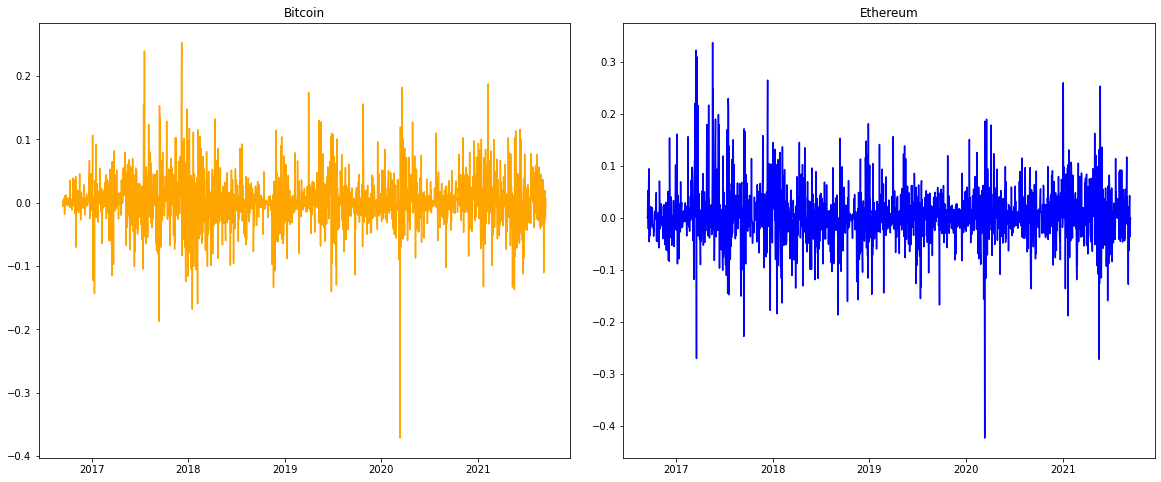

In [25]:
fig, axs = plt.subplots( 1, 2, figsize = (20,8) , gridspec_kw = { 'hspace' : 0.2 , 'wspace' : 0.1 })


axs[0].plot(daily_returns['BTC-USD'], c = 'orange')
axs[0].set_title('Bitcoin')

axs[1].plot(daily_returns['ETH-USD'] , c = 'blue' ) 
axs[1].set_title('Ethereum')

plt.show()

## How are the returns distributed ? 

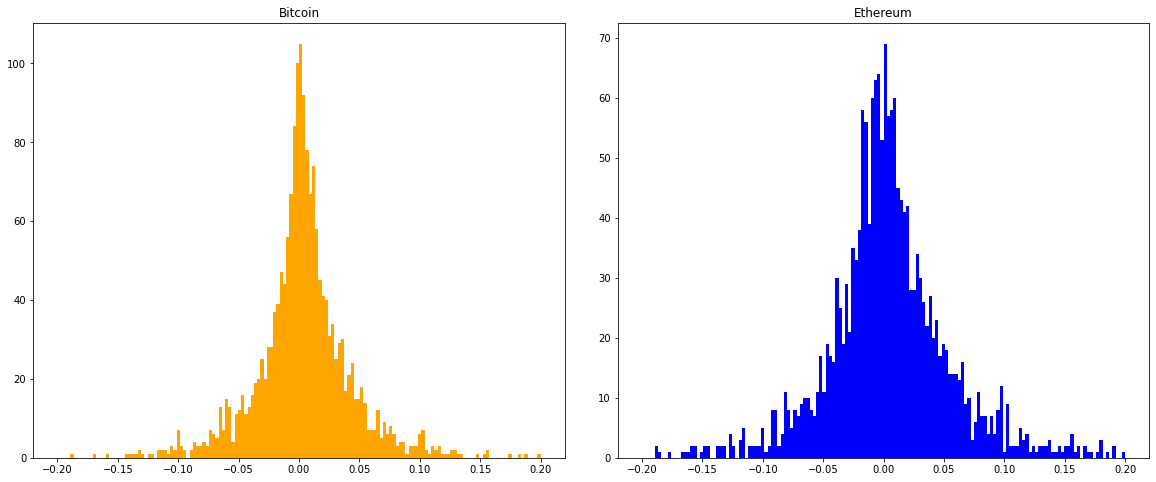

In [32]:
fig, axs = plt.subplots( 1, 2, figsize = (20,8) , gridspec_kw = { 'hspace' : 0.2 , 'wspace' : 0.1 })


axs[0].hist(daily_returns['BTC-USD'], bins = 150, color = 'orange', range = (-0.2,0.2))
axs[0].set_title('Bitcoin')

axs[1].hist(daily_returns['ETH-USD'] , bins = 150, color = 'blue' ,  range = (-0.2,0.2)) 
axs[1].set_title('Ethereum')

plt.show()